<h1><center>Extracting Source Infromation from Gravitational Wave Data:<br>
GW170817 Case Study</center></h1>
<h2><center>Amber L. Stuver<br>
Villanova University</center></h2>

<center><a href = "mailto: amber.stuver@ligo.org">amber.stuver@ligo.org</a></center>

In this exercise, we will demonstrate how astrophysical information about the source can be extracted from a gravitational wave signal.  The signal used here is an approximation of the GW170817 signal, which was a binary neutron star merger that was also observed though electromagnetic observations.  You can read more about this event <a href='https://www.ligo.org/science/Publication-GW170817BNS/index.php'>here</a>.

<b>OUTLINE:</b>
1. Import libraries, define constants, and load gravitational wave data
2. Determine the frequency of each cycle in the signal
3. Determine the chirp mass
4. Make some assumptions to determine the component masses
5. Determine the orbital separation
6. Determine the tangential velocity
7. Conclusion
8. Links to relevant literature

<b>Please note</b> that this activity uses equations derived from the linearization of general relativity which is only valid in the weak field regime, that is, where gravity is weak.  Near the merger portion of the gravitational wave signal, this approximation breaks down and is no longer valid.  A full treatment of relativity is needed at that point.

<h2>1. Import libraries, define constants, and load gravitational wave data:</h2>

Let's start by asking the question, <b>"How do scientists know what produced a gravitational wave they detected?"</b>  The answer to that is that the information is encoded on the signal itself and we will begin to learn how to decode this information here.  There was a lot of excitement around the neutron star binary merger that was observed in August 2017 by LIGO (gravitational waves) and the Fermi & INTEGRAL satellites (gamma-rays), followed quickly by observations of other kinds of light (optical, infrared, ultraviolet, radio, x-ray) by astronomers all around the world.  Of all of the observations made of this event, only the gravitational wave data provided the information needed to know that this was a binary neutron star merger. 

<b>We will work through the basic steps needed to reach this conclusion.</b>  All of these results are estimates since we are working with an approximation of the signal (only accurate to $1\times10^{-24}$ in strain) and because we are not using full general relativity; the results are still empowering to all aspiring gravitational wave astronomers!

First, let's load the needed libraries, define needed constants, and load in an approximation of the GW170817 signal...

--2019-08-29 14:58:24--  https://raw.githubusercontent.com/jkanner/aapt/master/GW170817.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.196.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.196.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4493326 (4.3M) [text/plain]
Saving to: ‘GW170817.txt.1’

GW170817.txt.1      100%[===================>]   4.29M  --.-KB/s    in 0.1s    

2019-08-29 14:58:25 (41.4 MB/s) - ‘GW170817.txt.1’ saved [4493326/4493326]

The number of samples in the data is 232609.


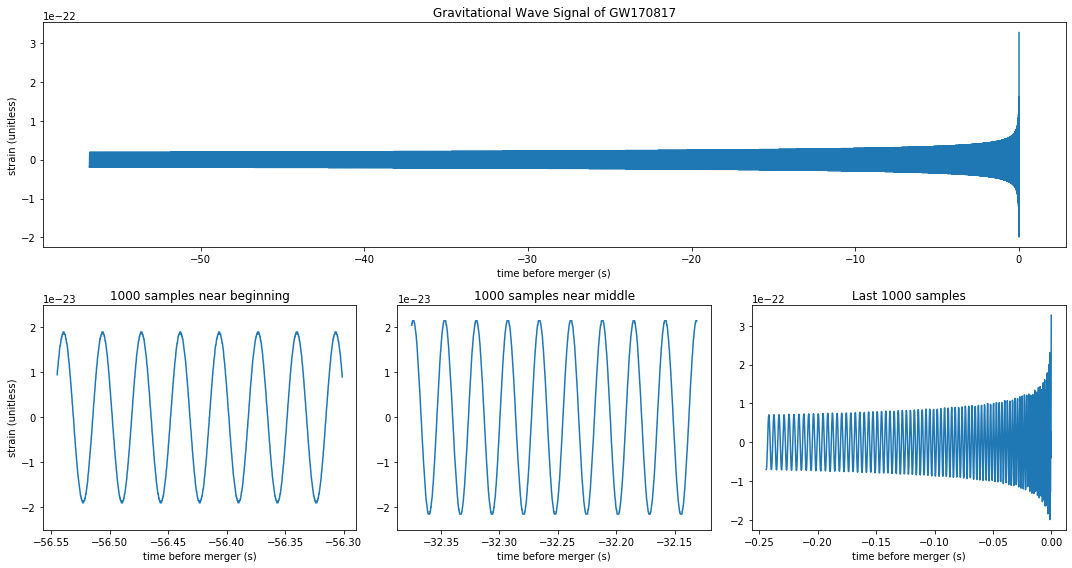

In [1]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline 

# CONSTANTS:
G = 6.67408e-11
c = 299792458 # m/s
Msun = 1.989e+30 # kg
r_Sun = 695.508e+6 # m
#Earth_Moon = 384472282 # m - helpful to convert orbital sep., but not needed
#r_Earth = 6.371e+6 # m - helpful to convert orbital sep., but not needed
#m2mi = 1609.344 # m - helpful to convert orbital sep., but not needed


# LOAD WAVEFORM DATA:
! wget https://raw.githubusercontent.com/jkanner/aapt/master/GW170817.txt
t, h = np.loadtxt('GW170817.txt', unpack=True)
print('The number of samples in the data is {}.'.format(len(h)))

# PLOT ALL THE DATA
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t, h) # plot all of the data
plt.grid(which='minor')
plt.title('Gravitational Wave Signal of GW170817')
plt.ylabel('strain (unitless)')
plt.xlabel('time before merger (s)')

# PLOT 1000 SAMPLES NEAR THE BEGINNING
#plt.figure()
plt.subplot(234)
plt.plot(t[1000:2000], h[1000:2000]) # plot indices 1000:2000 (1000 samples)
#plt.grid(which='minor')
plt.ylim([-2.5e-23, 2.5e-23])
plt.title('1000 samples near beginning')
plt.ylabel('strain (unitless)')
plt.xlabel('time before merger (s)')

# PLOT 1000 SAMPLES NEAR THE MIDDLE
#plt.figure()
plt.subplot(235)
plt.plot(t[100000:101000], h[100000:101000]) # plot indices 100000:101000 (1000 samples)
#plt.grid(which='minor')
plt.ylim([-2.5e-23, 2.5e-23])
plt.title('1000 samples near middle')
#plt.ylabel('strain (unitless)')
plt.xlabel('time before merger (s)')

# PLOT 1000 SAMPLES AT THE END
#plt.figure()
plt.subplot(236)
plt.plot(t[-1000:], h[-1000:]) # plot last 1000 samples
plt.title('Last 1000 samples')
#plt.grid(which='minor')
#plt.ylabel('strain (unitless)')
plt.xlabel('time before merger (s)')
plt.tight_layout()
plt.savefig('fig1.eps', format='eps')

As can be seen in this signal, the amplitude grows in time.  If you look closely at smaller  sections of the signal (the last 3 plots of 1000 samples from near the beginning, near the middle, and at the end of the signal), it can also be seen that the period is decreasing with time as well - this is the important quantity.  This kind of waveform is known as a "chirp" since a bird's chirp has similar characteristics.

We can use this information and Kepler's third law to establish our first assumption.  Recall the equation for Kepler's law:

\begin{equation}
P_{orb}^{2} = R^{3}\bigg[ \frac{4\pi^{2}}{G(m_{1}+m_{2})} \bigg]
\end{equation}

where $P_{orb}$ is the orbital period, and $R$ is the orbital radius (semi-major axis for elliptical orbits).

<b>Please note</b>, because the lowest order of gravitational radiation is quadrupolar, the period of a gravitational wave, $P_{gw}$, is half the orbital period of the system:

\begin{equation}
P_{orb} = 2P_{gw}
\end{equation}

SIGNAL OBSERVATIONS:

1. When two objects orbit each other in space, they will radiate energy and angular momentum away in gravitational waves which will reduce their orbital separation ($R$ in Kepler's law).  At the same time, the period will also decrease. 
2. Because of the reduction in orbital separation, the masses will also be accelerating more rapidly.  Since gravitational waves are created by accelerating masses, this results in the production of stronger (higher amplitude) gravitational waves. 

<b>Therefore, based on our understanding of physics, we hypothesize that the source of this signal is a binary system.</b>

Learning more about this system's mass will tell us if the system contains black holes, neutron stars, or normal stars.  We will assume that both objects in the binary system are of the same kind, i.e. 2 black holes, or 2 neutron stars, or 2 normal stars.

To do this, we will need to be able to measure how the period/frequency of the gravitational wave changes over time.  A simple way to do this is to assume that the rate of change is negligible over a cycle and determine the length of individual cycles.  We will do this by finding the times of the zero crossings of the signal...

<h2>2. Determine the fequency of each cycle in the signal:</h2>

To find the zero crossings, we find the indices of the elements that have a negative value, and then determine the interval between these indices. Adjacent indices will have an interval of 1.  To find where we cross the zero value from negative to positive, we find where indices are not adjacent.  Use these non-adjacent indices to determine the times of new periods.  This then directly allows us to measure $P_{gw}$ and the frequency of the gravitational wave, $f$.

<b>Note:</b> This is an excellent programming exercise to have students write their own algorithm to find the zero crossings.  This is not the only implementation that will produce accurate results.

In [2]:
# DETERMINE FREQUENCY FROM THE ZERO CROSSINGS:
# find indices of negative numbers
ndx_neg = np.where(h != abs(h))[0] 
# find interval between indices of negative numbers
diff_ndx = np.diff(ndx_neg)
# find last negative value in every interval
last_neg = np.where(diff_ndx > 1)[0] 
# index of begining of each period
ndx_period = ndx_neg[last_neg]
# determine times of new periods
t_period = t[ndx_period]
# determine the period of each cycle
Pgw = np.diff(t_period) 
# fix t_period to be the same length as Pgw
t_period = t_period[1:]

# determine the frequency of each cycle
f = 1/Pgw 

<h2>3. Determine the chirp mass:</h2>

The chirp mass is a quantity that appears frequently in gravitational wave physics and is needed to describe how the period of an inspiral signal changes over time, just like we've seen in our signal.  The chirp mass, $M_{c}$, is defined to be:

\begin{equation}
M_{c} = \frac{(m_{1}m_{2})^{\frac{3}{5}}}{(m_{1}+m_{2})^{\frac{1}{5}}}
\end{equation}

where $m_{1}$ and $m_{2}$ are the component masses of the binary system.  An important point to make about the chirp mass that it doesn't tell us about the individual component masses.  <b>For the same chirp mass, we can have anything from an equal mass system to wildly different mass ratios.</b>  Only a full treatment of general relativity can truly separate these variables, but we can make some simplifying assumptions that will help us later.

The chirp mass can be extracted from a gravitational wave signal by measuring the time derivative of the frequency of the gravitational wave, $\dot{f}$:

\begin{equation}
M_{c} = \frac{c^{3}}{G}\bigg[ \Big( \frac{5}{96} \Big)^{3} \pi^{-8} f^{-11} \dot{f}^{3} \bigg]^{\frac{1}{5}}
\end{equation}

While this is effective, you can run into calculation issues if $\dot{f}$ is ever negative.  While this should never happen in nature, noisy data or round off errors can produce a negative $\dot{f}$.  So we will take a different approach;  <b>we will find the chirp mass from the slope of $f^{-\frac{8}{3}}$.</b>

If you integrate the last expression, the result is:

\begin{equation}
f^{-\frac{8}{3}} = \frac{(8\pi)^{\frac{5}{3}}}{5} \Big( \frac{GM_{c}}{c^{3}} \Big) (t_{c} - t)
\end{equation}

where $t_{c}$ is the time of coalescence.  Since our data set's time origin is the merger event, $t_{c}=0$, when you differentiate this, you will find that the chirp mass, $M_{c}$, is proportional to the slope of $f^{-\frac{8}{3}}$:

\begin{equation}
\frac{\mathrm{d}f^{-\frac{8}{3}}}{\mathrm{d}t}=\textrm{slope}=s=-\frac{(8\pi)^{\frac{5}{3}}}{5} \Big( \frac{GM_{c}}{c^{3}} \Big)
\end{equation}

Setting the slope as the variable $s$, the chirp mass is then:

\begin{equation}
M_{c} = \frac{c^{3}}{ G(8\pi)^{\frac{8}{5}} }\big( -5s \big)^{\frac{3}{5}}
\end{equation}

The chirp mass is 1.176 solar masses.
  (For reference, the published chirp mass of GW170817 is 1.186 solar masses.)



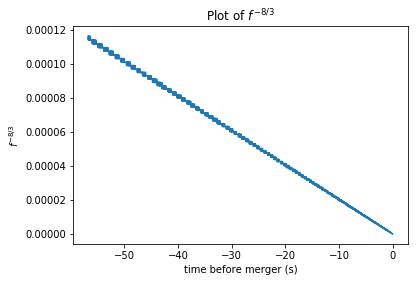

In [3]:
# DETERMINE CHIRP MASS:
f83 = f**-(8/3) # make this its own variable for ease of use

# A plot of f**-(8/3) vs t_period will show a linear trend whose slope is an estimate of the chirp mass
plt.figure(3)
plt.plot(t_period,f83)
plt.grid(which='minor')
plt.title('Plot of $f^{-8/3}$')
plt.ylabel('$f^{-8/3}$')
plt.xlabel('time before merger (s)')

# use scipy.stats.linregress (imported as lingress), to find the slope
slope, intercept, r_value, p_value, std_err = linregress(t_period, f83)

# uncomment below for alternate slope calculation
'''
# this is straightforward but less accurate...
dx = np.diff(t_period)
dy = np.diff(f83)
slopes = dy/dx
slope = np.mean(slopes)
'''

# chirp mass in kg
mc = c**3 * G**(-1) * (8*np.pi)**(-8/5) * (-5 * slope)**(3/5) # kg
# chirp mass in Msun
mc_solar = mc/Msun
print('The chirp mass is {:0.3f} solar masses.'.format(mc_solar))
print('  (For reference, the published chirp mass of GW170817 is 1.186 solar masses.)\n')

Below is a graphic of the masses of the observed black holes and neutron stars as of the time of the GW170817 detection (August 2017).  From this, we can see that this chirp mass, which is a combination of the component masses, is much less than any observed black hole system.  We will proceed assuming that this is a pair of neutron stars.  If we are right, then when we calculate the orbital separation it will be much smaller than the radius of a typical star.  More on that later...

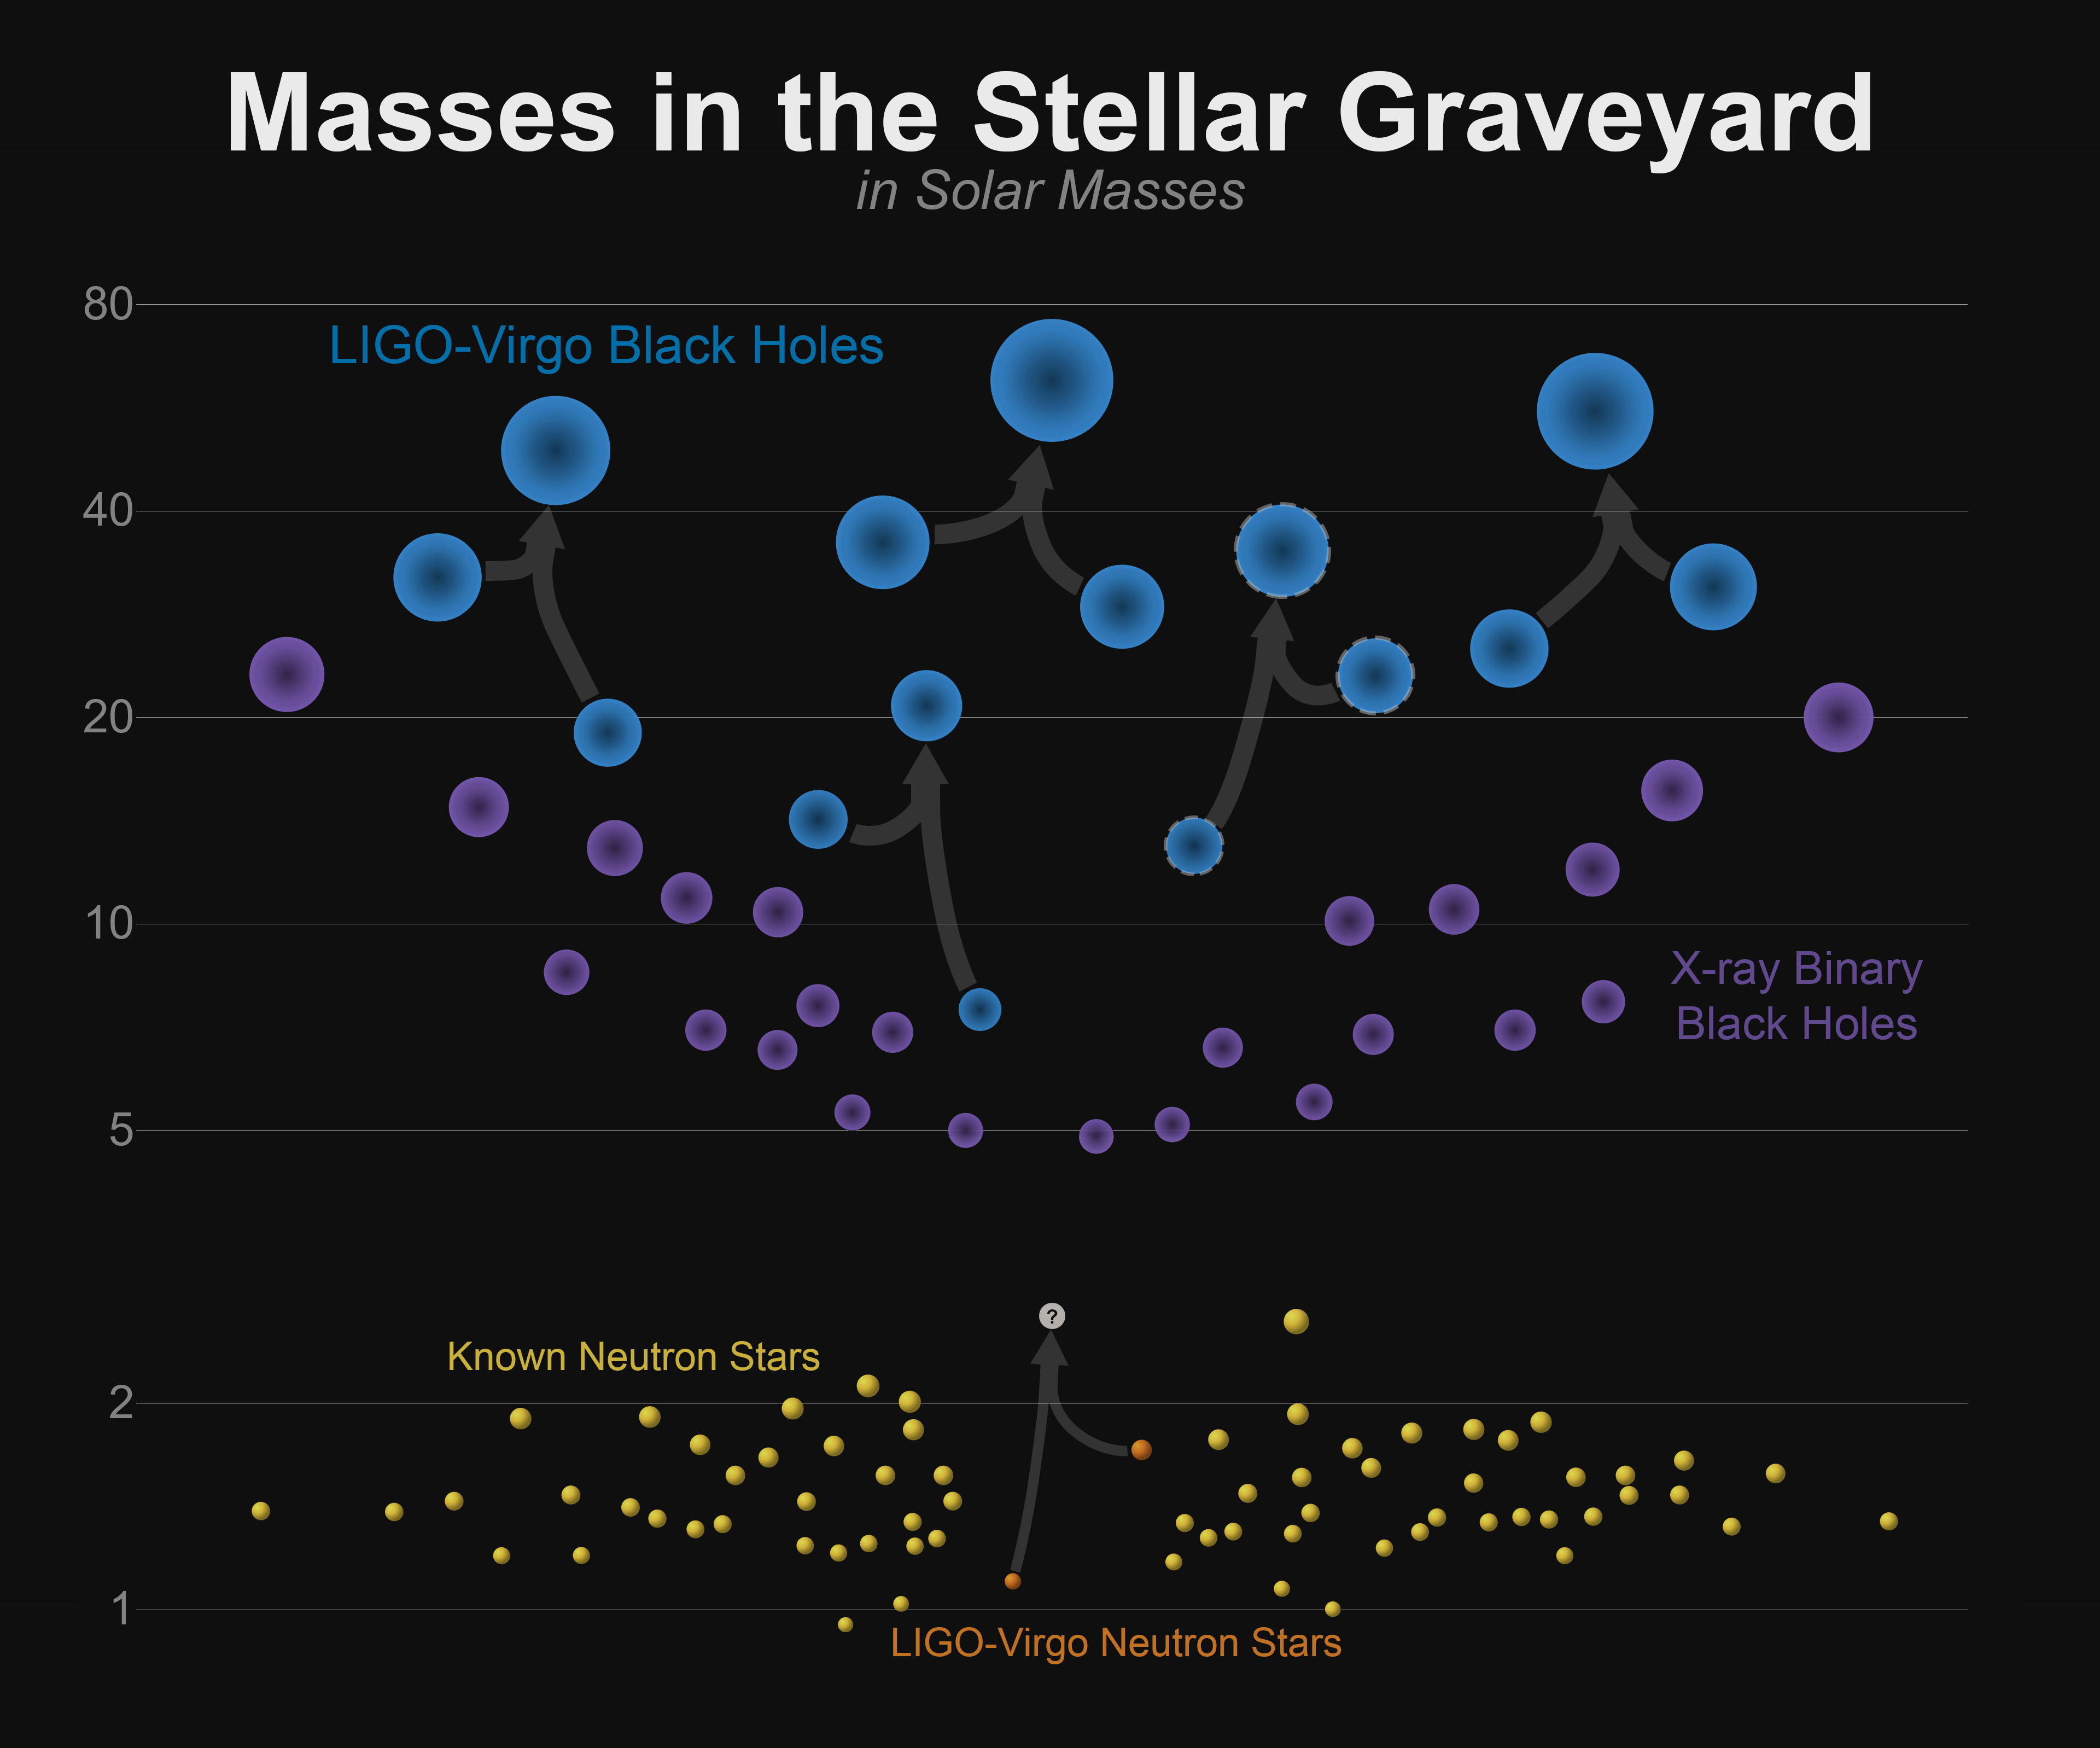

<h2>4. Make some assumptions to determine the component masses:</h2>

If we know the chirp mass, and we can make an assumption about the one of the component masses, we can solve for the other component mass. 

Since the chirp mass is small, it is unlikely that this is a binary black hole system.  Let's assume that $m_{1}$ is 1.4 $M_{Sun}$.  This is the a typical mass for a neutron star, also known as the Chandrasekhar limit.  We will check if this is a neutron star or a normal star when we calculate the scale of the orbital separation.)  The solution for $m_{2}$ in terms of the chirp mass, $M_{c}$, is:

\begin{equation}
0 = \Big(\frac{1}{M_{c}^{5}}\Big)m_{2}^{3} + \big(0\big)m_{2}^{2} + \Big(-\frac{1}{m_{1}^{3}}\Big)m_{2} + \Big(-\frac{1}{m_{1}^{2}}\Big)
\end{equation}

This is a cubic equation.  Using the notation:

\begin{equation}
0 = ax^{3} + bx^{2} + cx + d
\end{equation}

Identifying $a = \frac{1}{M_{c}^{5}}$, $b = 0$, $c = -\frac{1}{m_{1}^{3}}$, and $d = -\frac{1}{m_{1}^{2}}$, we can use the roots function from the NumPy library to solve for $m_{2}$.  You will always get one positive root and 2 imaginary roots given the values of $M_{c}$ and $m_{1}$.  The solution we are looking for is the real root.

<b>Note:</b>  Be careful not to overwrite c = the speed of light with the coefficient c here.  In the code below, I use capital C for this coefficient.

In [4]:
# MAKE ASSUMTIONS TO DETERMINE INDIVIDUAL MASSES:
# assume m1 is 1.4 solar masses (typical NS)
m1 = 1.4 # solar masses

# solve cubic equ to determine m2 from chirp mass 
a = 1/mc_solar**5
b = 0 
C = -1/m1**3 # Cap C because c is speed of light
d = -1/m1**2
m2 = np.roots([a,b,C,d]) # solar masses

# sealect only the real roots
re = np.isreal(m2) # find the real root
m2 = m2[re].real # return only the real part of the real root
# select only the positive roots
pos = np.where(m2 > 0) # find the positive roots
m2 = m2[pos] # return only the real roots
print('Assuming m1 = {:0.2f} solar masses, then m2 = {:0.2f} solar masses.'.format(m1,m2[0]))
print('  (For reference, the published component masses of GW170817 are 1.46 and 1.27 solar masses.)\n')

Assuming m1 = 1.40 solar masses, then m2 = 1.30 solar masses.
  (For reference, the published component masses of GW170817 are 1.46 and 1.27 solar masses.)



For comparison, the published values of all gravitational waves detected to date (January 2019) are shown in the table below.  The gravitational wave signal in question, GW170817, is in the red box.  $m_{1}$, $m_{2}$, and $M_{c}$ are listed in the second, third, and fourth (last) columns, respectively.

We can also use this information to support that our assumption that the chirp mass is probably too small to be from a black hole binary system.  All of the gravitational wave events, other than GW170817 (in the red box), were from binary black hole systems and the GW170817 chirp mass is 8 times smaller than the smallest chirp mass produced by a binary black hole gravitational wave and therefore much smaller than any other detected binary black hole system.

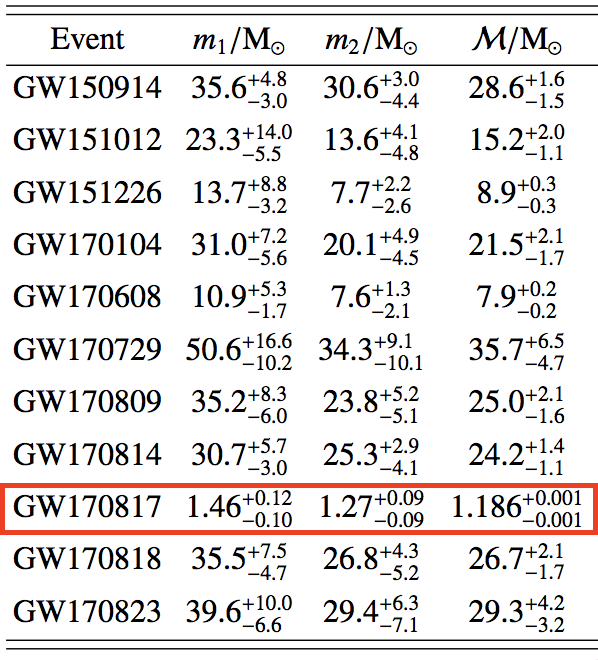

<h2>5. Determine the orbital separation:</h2>

Now that we have an estimate of the individual masses of the system, we can use Kepler's law to determine the orbital separation between the objects.  Solving Kepler's law (above) for $R$:

\begin{equation}
R = \bigg[ G(m_{1}+m_{2}) \bigg( \frac{P_{orb}}{2\pi} \bigg)^{2} \bigg]^{\frac{1}{3}}
\end{equation}

Remember:

\begin{equation}
P_{orb} = 2P_{gw}
\end{equation}

Text(0.5,1,'Orbital Separation')

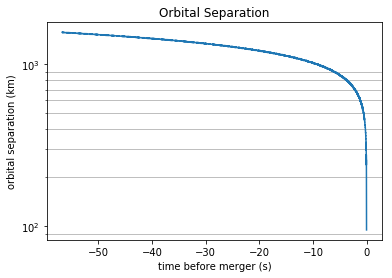

In [5]:
# DETERMINE ORBITAL SEPARATION:
Porb = 2*Pgw
mtot = (m1+m2)*Msun
R = ( G * mtot * (Porb/2*np.pi)**2 )**(1/3) # in m

# plot result
plt.figure(1)
plt.semilogy(t_period, R/1000)
plt.grid(which='minor')
plt.ylabel('orbital separation (km)')
plt.xlabel('time before merger (s)')
plt.title('Orbital Separation')

Let's look at the orbital separation at the very beginning of this signal and compare it to the radius of our Sun, a normal star:

In [6]:
# compare the first (largest) orbital separation to the radius of the Sun
print('The largest orbital separation of our signal is {:0.2f}% the radius of our Sun.'.format(R[0]*100/r_Sun))

The largest orbital separation of our signal is 0.23% the radius of our Sun.


This supports our assumption that this was a binary neutron star system and not one composed of two normal stars.  (This is about 1600 km and the typical radius for a neutron star is about 10 km.)  Otherwise, our system would have merged earlier, and at a much lower $P_{orb}$.

<h2>6. Determine the tangential velocity:</h2>

Given the orbital distance, $R$, and the orbital period, $P_{orb}$, we can calculate the tangential velocity of the binary system during its evolution:

\begin{equation}
v = 2\pi \Big( \frac{R}{P_{orb}}\Big)
\end{equation}

Text(0.5,1,'Tangential Velocity')

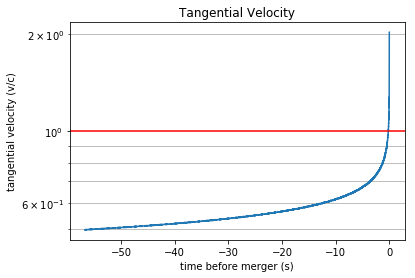

In [7]:
# DETERMINE TANGENTIAL VELOCITY:
v = 2 * np.pi * R / Porb

# plot result
plt.figure(2)
plt.semilogy(t_period, v/c)
plt.axhline(1, color='r') # plot red line indicating the speed of light (c)
plt.grid(which='minor')
plt.ylabel('tangential velocity (v/c)')
plt.xlabel('time before merger (s)')
plt.title('Tangential Velocity')

Here is where we can clearly see the breakdown of the linearized approximation of general relativity since, as we approach merger, our tangential velocity exceeds the speed of light (noted with the red horizontal line).  Using a full treatment of general relativity prevents this from happening, but it is important to see that our approximation really does have its limits.

<h2>7. Conclusion:</h2>

We began this exercise with the objective to determine the source of a gravitational wave given only the signal data.  From inspection of the evolution of the waveform, we identified that this has the properties of a chirp signal and, using Kepler's third law, we reasoned that the source was likely a binary system.  We then calculated the chirp mass and reasoned that since it was on the order of a solar mass, it would be unlikely that the masses in question were from black holes (we also assumed that both masses were of the same kind of mass).  This left us with the masses being either neutron stars or normal stars.  We then assumed that one of the two masses was 1.4 $M_{Sun}$, a typical mass of a neutron star, but not unreasonable for the possibility of normal stars either.  While this is not evidence for or against the system being composed of neutron stars, we did recover values of the component masses that are consistent with the published values.  We then calculated the largest orbital separation of our system to be a fraction of the radius of the Sun, which supports that the component masses are much more dense than a normal star, leading us to conclude that the system that created the GW170817 gravitational wave signal was likely a binary neutron star system.

<h2>8. Links to relevant literature:</h2>

- L. Rubbo, S. Larson, M. Larson, D. Ingram, "Hands-on gravitational wave astronomy: Extracting astrophysical information from simulated signals", *American Journal of Physics* **75**, 597 (2007); https://doi.org/10.1119/1.2721587.  (Accompanying activity here: http://cgwp.gravity.psu.edu/outreach/activities/handson_activity/)

- L. Burko, "Gravitational Wave Detection in the Introductory Lab", *The Physics Teacher* **55**, 288 (2017); https://doi.org/10.1119/1.4981036.

- LIGO Scientific and Virgo Collaborations, "The basic physics of the binary black hole merger GW150914", *Annalen der Physik*, **529**, No. 1-2, 1600209 (2017); https://doi.org/10.1002/andp.201600209

- H. Mathur, K. Brown, A. Lowenstein, "An analysis of the LIGO discovery based on introductory physics", *American Journal of Physics* **85**, 676 (2017); https://doi.org/10.1119/1.4985727.

- B. Farr, G. Schelbert, L. Trouille, "Gravitational wave science in the high school classroom", *American Journal of Physics*, **80**, 898 (2012); https://doi.org/10.1119/1.4738365.